## Pair Programming - Regresión lineal 2

### Test Estadísticos

---

### 1. Importamos las librerías necesarias.

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Test estadísticos
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
sns.set_palette("flare")

### 2. Abrimos el archivo con el que vamos a trabajar.

In [3]:
df = pd.read_csv("../archivos/metro_A.csv", index_col=0)

In [4]:
df.head(2)

,season,weekday,cat_time,holiday_cat,temp_c,snow_1h,traffic_volume
0,Autumn,tuesday,morning,no,15.13,0.0,5545
1,Autumn,tuesday,morning,no,16.21,0.0,4516


---

**Hipótesis:**

H0 --> la hora y el día no afecta en el tráfico del metro

H1 --> la hora y el día si afecta en el tráfico del metro

Error de Tipo I --> rechazamos la H0 cuando es verdadera, es decir, creemos que SI afecta al tráfico en el metro pero en realidad no.

Error de Tipo II --> cuando la H0 es falsa y la aceptamos, es decir, creemos que NO afecta al tráfico en el metro pero si

---

### 3. Test estadísticos de la normalidad de la variable respuesta.

### 3.1. Método analítico - Asimetría.

In [5]:
df["traffic_volume"].skew()

-0.08906123810374805

Vemos que los datos de la variable respuesta son asimétricos negativos, su distribución no es normal, por tanto su media será menor que la mediana y la moda.

### 3.2. Método analítico - Curtosis.

In [6]:
kurtosistest(df["traffic_volume"])

KurtosistestResult(statistic=-497.0770315067857, pvalue=0.0)

Dado que el p-valor de la variable respuesta es 0.0 vemos que el resultado de la prueba de la curtosis nos dice que es la distribución es de tipo mesocurtosis.

### 3.3. Gráfica de la distribución de la variable respuesta.

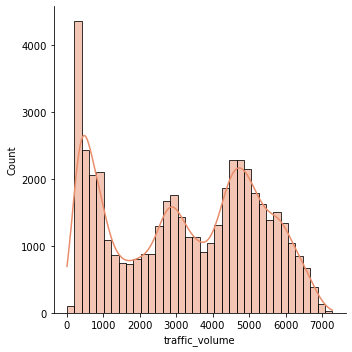

In [7]:
sns.displot(df["traffic_volume"], kde = True);


### 3.4. Test de normalidad Kolmogorov- Smirnov.

Usamos el test de kolmogorov porque tenemos más de 5000 registros

In [8]:
kstest(df["traffic_volume"], "norm")

KstestResult(statistic=0.9994809012206758, pvalue=0.0)

H0: los datos son normales

H1: los datos no son normales

p-valor < 0.05 --> rechaza la H0, los datos no son normales.

p-valor> 0.05 --> acepta la H0, los datos son normales.

Según los resultados del test el p-valor < 0.05 y como podemos ver en la gráfica, nuestros **datos no son normales.**